## CNN Evrişimsel Sinir Ağları Örneği

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

In [2]:
# Veriyi içeri alalım
veri = pd.read_csv("/DATA/datasets/egitim.csv")
# 28x28 pixel 785 sütunlu bir veri
print("Veri boyutu : ", veri.shape)
veri.head()

Veri boyutu :  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Etiketleri Ayıralım

In [3]:
# label 'ları ayıralım
Y_veri = veri["label"]
# X Eğitim veri seti
X_veri = veri.drop(["label"], axis = 1)
print("X veri : ", X_veri.shape)
print("Y veri : ", Y_veri.shape)

X veri :  (42000, 784)
Y veri :  (42000,)


### Veri Adetlerini Görselleştirelim

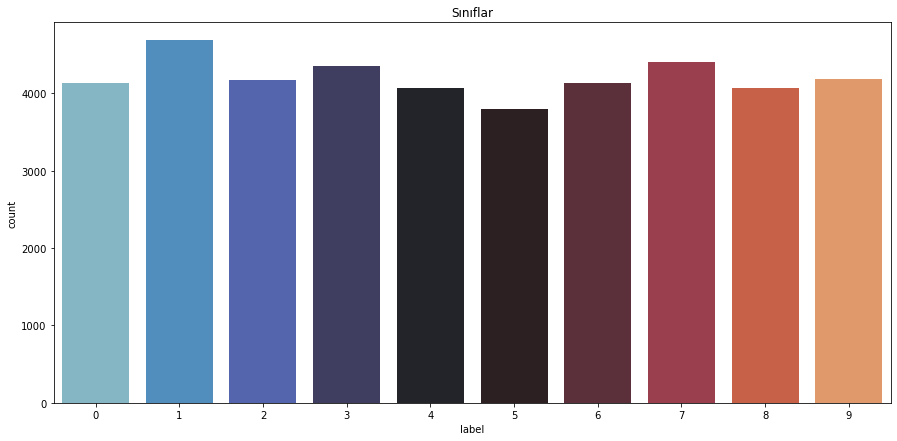

sınıflar ve örnek sayıları :  1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [4]:
# Görselleştirme
plt.figure(figsize = (15, 7))
g = sns.countplot(Y_veri, palette = "icefire")
plt.title("Sınıflar")
plt.show()
print("sınıflar ve örnek sayıları : ", Y_veri.value_counts())

### Resmin Boyutu

In [5]:
# resmin boyutu
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

### Verimizi görselleştirelim - 2 Sınıfı

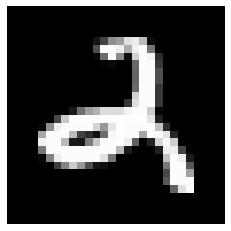

In [6]:
# Görsel - 2 sınıfı
resim1 = X_veri.iloc[1900].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()


### Verimizi görselleştirelim - 3 Sınıfı

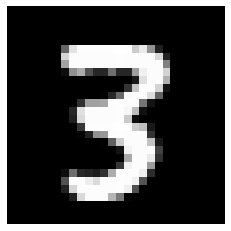

In [7]:
# Görsel - 3 sınıfı
resim1 = X_veri.iloc[19500].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()

### Verimizi görselleştirelim - 4 Sınıfı

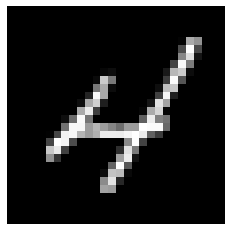

In [8]:
# Görsel - 4 sınıfı
resim1 = X_veri.iloc[700].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()


### Verimizi Normalleştirelim.

In [9]:
# Normalizasyon
X_veri = X_veri / 255.0

### Verimizi Reshape Edelim

In [10]:
# reshape
X_veri = X_veri.values.reshape(-1, 28, 28, 1)
print("X eğitim boyut : ", X_veri.shape)

X eğitim boyut :  (42000, 28, 28, 1)


### Etiketleri Kodlayalım

In [11]:
# etiket kodlama
from keras.utils.np_utils import to_categorical # vektöre çevirmek için
y_veri = to_categorical(Y_veri, num_classes = 10)

### Verinin test ve train olarak bölünmesi

In [12]:
# train ve test bölünmesi
from sklearn.model_selection import train_test_split
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri, Y_veri, test_size = 0.1, random_state = 2)
print("X train : ", X_egitim.shape)
print("X test : ", X_test.shape)
print("Y train : ", Y_egitim.shape)
print("Y test : ", Y_test.shape)

X train :  (37800, 28, 28, 1)
X test :  (4200, 28, 28, 1)
Y train :  (37800,)
Y test :  (4200,)


### Kütüphaneleri Yükleyelim.

In [14]:
# Kütüphaneleri yükleyelim.
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# Burada hata var 
# from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# bu eklenebilir.
'''
from tensorflow.keras import optimizers
optimizers.RMSprop
optimizers.Adam
'''

# veya bu şekilde eklenebilir.
from tensorflow.keras.optimizers import RMSprop,Adam
import tensorflow as tf

### Modelleme

In [23]:
model = Sequential()
# evrişim, ortaklama, seyreltme - 1 
# 2 Boyutlu convolution yapılacak
model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = "Same",
    activation = "relu", input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
# 0.25 oranında seyreltme yapılıyor.
model.add(Dropout(0.25))
# evrişim, ortaklama, seyreltme - 2
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same",
    activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
# 0.25 oranında seyreltme yapılıyor.
model.add(Dropout(0.25))
# tam bağlantı
# Düzleştirme
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
# Seyreltme
model.add(Dropout(0.5))
# Çıkışta softmax kullanıyoruz.
model.add(Dense(10, activation = "softmax"))

### Optimizer Belirlenmesi - Adam Optimizer Kullanacağız

In [24]:
# Adam optimizasyon yöntemi
optimizer = tf.keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

### Modelin Derlenmesi

In [32]:
# modeli derleyelim.
# Kategorik çapraz entopi maliyet yöntemi kullanılıyor.
# Aşağıdaki yöntem eğitimde hata verdi.
# model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
model.compile(optimizer = optimizer, 
    loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### Döngü sayısı ve eğitim boyutu

In [34]:
# Döngü sayısı ve eğitim boyutu
batch_size = 250
epochs = 10

### Overfitting için yapay olarak veri seti genişletmesi yapılıyor.
### Bu yönteme data augmentation denilir.

In [35]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False, # girdi ortalmasını veri kümesi üzerinden 0 olarak ayarla
    samplewise_center = False, # her bir örenk ortalamasını 0 olarak ayarla
    featurewise_std_normalization = False, # girdileri veri kümesinin standartlarına böl
    samplewise_std_normalization = False, # her girdiyi std'ye böl
    zca_whitening = False, # dimension reduction
    rotation_range = 5, # boyut küçültme
    zoom_range = 0.1, # %10 görüntüyü rasgele yaklaştır.
    width_shift_range = 0.1, # yatay rasgele kaydır
    height_shift_range = 0.1, # dikey rasgele kaydır
    horizontal_flip = False, # yatay rasgele çevir
    vertical_flip = False # dikey rasgele çevir
)
datagen.fit(X_egitim)

### Modelin eğitilmesi

In [36]:
# Modeli eğitelim.
history = model.fit_generator(
    datagen.flow(X_egitim, Y_egitim, batch_size = batch_size),
    epochs = epochs, validation_data = (X_test, Y_test), 
    steps_per_epoch = X_egitim.shape[0] // batch_size, verbose = 2
)

Epoch 1/10
151/151 - 15s - loss: 1.1410 - accuracy: 0.6140 - val_loss: 0.2366 - val_accuracy: 0.9360 - 15s/epoch - 100ms/step
Epoch 2/10
151/151 - 16s - loss: 0.4572 - accuracy: 0.8528 - val_loss: 0.1564 - val_accuracy: 0.9569 - 16s/epoch - 107ms/step
Epoch 3/10
151/151 - 19s - loss: 0.3421 - accuracy: 0.8909 - val_loss: 0.1106 - val_accuracy: 0.9681 - 19s/epoch - 125ms/step
Epoch 4/10
151/151 - 19s - loss: 0.2786 - accuracy: 0.9124 - val_loss: 0.0903 - val_accuracy: 0.9729 - 19s/epoch - 126ms/step
Epoch 5/10
151/151 - 19s - loss: 0.2517 - accuracy: 0.9211 - val_loss: 0.0799 - val_accuracy: 0.9748 - 19s/epoch - 124ms/step
Epoch 6/10
151/151 - 16s - loss: 0.2270 - accuracy: 0.9299 - val_loss: 0.0709 - val_accuracy: 0.9798 - 16s/epoch - 104ms/step
Epoch 7/10
151/151 - 17s - loss: 0.2063 - accuracy: 0.9358 - val_loss: 0.0665 - val_accuracy: 0.9802 - 17s/epoch - 110ms/step
Epoch 8/10
151/151 - 21s - loss: 0.1989 - accuracy: 0.9392 - val_loss: 0.0605 - val_accuracy: 0.9831 - 21s/epoch - 141

### Maliyeti Görselleştirelim

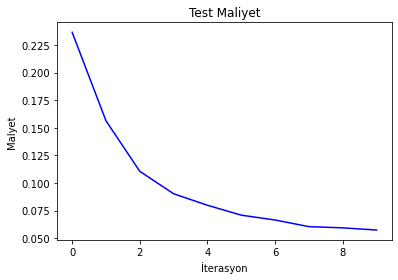

In [37]:
# maliyet görselleştirme
plt.plot(history.history["val_loss"], color = "b")
plt.title("Test Maliyet")
plt.xlabel("İterasyon")
plt.ylabel("Malyet")
plt.show()

### Tahmin Yapalım

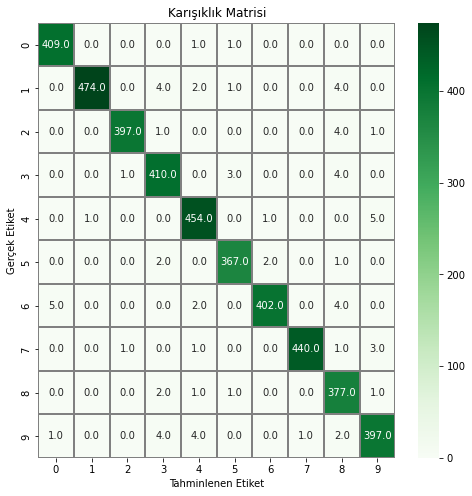

In [39]:
# veri test setinden tahmin edilmesi
Y_pred = model.predict(X_test)
# tahmin edilen veriyi çevir
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# test verisini çevir
# bu satır hatalı
# Y_true = np.argmax(Y_test, axis = 1)
Y_true = Y_test.astype(int).tolist()
# karışıklık matrisi
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# karışıklık matrisini çiz
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, 
    cmap = "Greens", linecolor = "gray", fmt = ".1f", ax = ax)
plt.xlabel("Tahminlenen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Karışıklık Matrisi")
plt.show()